In [1]:
#Classify the target as pass or fail

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
df_dropped = df[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet', 'G3']]
df_dropped

,sex,age,Medu,reason,traveltime,studytime,freetime,higher,failures,internet,G3
0,F,18,4,course,2,2,3,yes,0,no,11
1,F,17,1,course,1,2,3,yes,0,yes,11
2,F,15,1,other,1,2,3,yes,0,yes,12
3,F,15,4,home,1,3,2,yes,0,yes,14
4,F,16,3,home,1,2,3,yes,0,no,13
...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,course,1,3,4,yes,1,yes,10
645,F,18,3,course,1,2,3,yes,0,yes,16
646,F,18,1,course,2,2,1,yes,0,no,9
647,M,17,3,course,2,1,4,yes,0,yes,10


<Axes: >

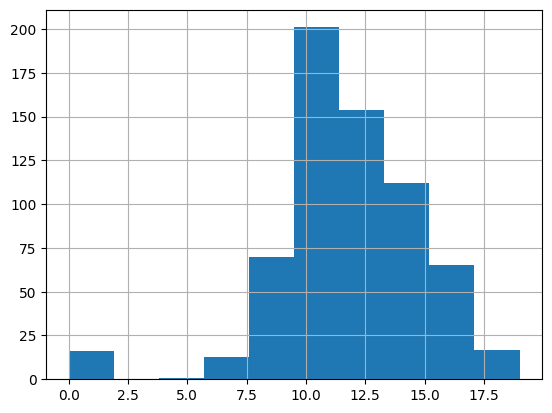

In [4]:
df_dropped['G3'].hist()


In [5]:
df_dropped.G3.describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [6]:
df_dropped['G3_binary'] = pd.cut(x = df_dropped['G3'], bins=[df_dropped['G3'].min()-1, df_dropped['G3'].mean(), df_dropped['G3'].max()+1], labels=['fail', 'pass'])
df_dropped

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_24320/2478147309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['G3_binary'] = pd.cut(x = df_dropped['G3'], bins=[df_dropped['G3'].min()-1, df_dropped['G3'].mean(), df_dropped['G3'].max()+1], labels=['fail', 'pass'])


,sex,age,Medu,reason,traveltime,studytime,freetime,higher,failures,internet,G3,G3_binary
0,F,18,4,course,2,2,3,yes,0,no,11,fail
1,F,17,1,course,1,2,3,yes,0,yes,11,fail
2,F,15,1,other,1,2,3,yes,0,yes,12,pass
3,F,15,4,home,1,3,2,yes,0,yes,14,pass
4,F,16,3,home,1,2,3,yes,0,no,13,pass
...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,course,1,3,4,yes,1,yes,10,fail
645,F,18,3,course,1,2,3,yes,0,yes,16,pass
646,F,18,1,course,2,2,1,yes,0,no,9,fail
647,M,17,3,course,2,1,4,yes,0,yes,10,fail


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

#Pre-processing pipeline

# Scale numerical values: 
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

# Encode categorical values
cat_transformer = OneHotEncoder()

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['age','Medu', 'traveltime', 'studytime', 'freetime', 'failures']),
    ('cat_transformer', cat_transformer, ['sex', 'reason', 'higher', 'internet']),
])

#Pipeline pipeline = Pipeline(preprocess, logit_model)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic regression', LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('logistic regression', LogisticRegression())])

In [8]:
df_dropped

,sex,age,Medu,reason,traveltime,studytime,freetime,higher,failures,internet,G3,G3_binary
0,F,18,4,course,2,2,3,yes,0,no,11,fail
1,F,17,1,course,1,2,3,yes,0,yes,11,fail
2,F,15,1,other,1,2,3,yes,0,yes,12,pass
3,F,15,4,home,1,3,2,yes,0,yes,14,pass
4,F,16,3,home,1,2,3,yes,0,no,13,pass
...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,2,course,1,3,4,yes,1,yes,10,fail
645,F,18,3,course,1,2,3,yes,0,yes,16,pass
646,F,18,1,course,2,2,1,yes,0,no,9,fail
647,M,17,3,course,2,1,4,yes,0,yes,10,fail


In [9]:
#label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_dropped['G3_binary_label'] = label_encoder.fit_transform(df_dropped['G3_binary'])


/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_24320/414043124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['G3_binary_label'] = label_encoder.fit_transform(df_dropped['G3_binary'])


In [10]:
from sklearn.model_selection import train_test_split

#Split the data into train and test
train_data, test_data = train_test_split(df_dropped, test_size=0.1, random_state=42)

#Ready X and Ys
X_train = train_data[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet']]
y_train = train_data['G3_binary_label']

X_test = test_data[['sex', 'age', 'Medu', 'reason', 'traveltime', 'studytime', 'freetime', 'higher',
       'failures', 'internet']]
y_test = test_data['G3_binary_label']


In [11]:
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

#precision
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)



0.75

In [12]:
#KNN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

#Pre-processing pipeline

# Scale numerical values: 
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

# Encode categorical values
cat_transformer = OneHotEncoder()

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['age','Medu', 'traveltime', 'studytime', 'freetime', 'failures']),
    ('cat_transformer', cat_transformer, ['sex', 'reason', 'higher', 'internet']),
])

#Pipeline pipeline = Pipeline(preprocess, logit_model)

pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('KNN', KNeighborsClassifier(n_neighbors=4))
])

pipeline2


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('KNN', KNeighborsClassifier(n_neighbors=4))])

In [13]:
pipeline2.fit(X_train, y_train)
y_predict2 = pipeline2.predict(X_test)

#precision
from sklearn.metrics import precision_score

precision_score(y_test, y_predict2)

#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_predict2)


0.7567567567567568

In [14]:
#Best number of neighbours, n=4
score = []
for i in range(1,10):
    pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('KNN', KNeighborsClassifier(n_neighbors=i))
    ])

    pipeline2.fit(X_train, y_train)
    y_predict2 = pipeline2.predict(X_test)

    score.append(precision_score(y_test, y_predict2))
    
score 

[0.7555555555555555,
 0.84375,
 0.7804878048780488,
 0.7567567567567568,
 0.74,
 0.7777777777777778,
 0.7254901960784313,
 0.7608695652173914,
 0.7446808510638298]

In [15]:
#Grid Search for best number of neighbours
from sklearn.model_selection import GridSearchCV
param_grid = {'KNN__n_neighbors': np.arange(20)}
grid_search = GridSearchCV(pipeline2, param_grid=param_grid)
grid_search.fit(X_train, y_train)

/Users/anekha/.pyenv/versions/3.10.6/envs/ml_for_learners/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anekha/.pyenv/versions/3.10.6/envs/ml_for_learners/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anekha/.pyenv/versions/3.10.6/envs/ml_for_learners/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/anekha/.pyenv

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_transformer',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'freetime',
                                                                          'failures']),
                                                                        ('cat_transformer',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'reason',
                                                                          'higher',
                                                                          'internet'])])),
                                       ('KNN',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'KNN__n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [16]:
#Random Forest 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

#Pre-processing pipeline

# Scale numerical values: 
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

# Encode categorical values
cat_transformer = OneHotEncoder()

# Parallelize "num_transformer" and "cat_transfomer"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['age','Medu', 'traveltime', 'studytime', 'freetime', 'failures']),
    ('cat_transformer', cat_transformer, ['sex', 'reason', 'higher', 'internet']),
])

#Pipeline pipeline = Pipeline(preprocess, logit_model)

pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('RandomForest', RandomForestClassifier())
])

pipeline3


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('RandomForest', RandomForestClassifier())])

In [17]:
pipeline3.fit(X_train, y_train)
y_predict3 = pipeline3.predict(X_test)

#precision
from sklearn.metrics import precision_score

precision_score(y_test, y_predict3)

#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_predict2)

0.782608695652174

In [35]:
#GridSearch
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
#grid = {
    #'learning_rate': [0.01, 0.1, 0.2,0.3,10,100],
    #'max_depth': [1,3,5],
    #'n_estimators': [50,100,500,600]
#}

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

# Instantiate Grid Search
search = GridSearchCV(
    cv = 5,
    estimator=pipeline3,
    param_grid=grid_space,
    n_jobs=-1 # parallelize computation
) 

# Fit data to Grid Search
search.fit(X_train, y_train)

ValueError: Invalid parameter 'max_depth' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('RandomForest', RandomForestClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [22]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

pipeline4 = Pipeline([
    ('preprocessor', preprocessor),
    ('boosting', model),
])

pipeline4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('boosting', GradientBoostingClassifier())])

In [29]:
pipeline4.fit(X_train, y_train)
y_predict4 = pipeline4.predict(X_test)

#precision
from sklearn.metrics import precision_score

precision_score(y_test, y_predict4)

0.7608695652173914

In [20]:
pipeline4.get_params()['boosting'].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

ValueError: Invalid parameter 'learning_rate' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'traveltime',
                                                   'studytime', 'freetime',
                                                   'failures']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(),
                                                  ['sex', 'reason', 'higher',
                                                   'internet'])])),
                ('boosting', GradientBoostingClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
#Random forest / boosting
# XGBoost
#LightGBM
#https://github.com/dreamquark-ai/tabnet
#https://shap.readthedocs.io/en/latest/
